In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df=pd.read_csv('clean_forest_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [6]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [7]:
df['Classes  '].value_counts()
df['Classes  ']=df['Classes  '].map({ "not fire" : 0, "fire":1 })

In [8]:
x=df.drop(['FWI'],axis=1)
y=df['FWI']

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [10]:
def corelation( dataset, threshold):
    col_corr= set()
    corr=dataset.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold :
                colname=corr.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [11]:
todrop=corelation(x_train,0.8)

In [12]:
# drop if correaltion is more than threhsold

In [13]:
x_train.drop (list(todrop),axis=1,inplace=True)
x_test.drop (list(todrop),axis=1,inplace=True)

In [14]:
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [15]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train_sc=scalar.fit_transform(x_train)
x_test_sc=scalar.transform(x_test)

<Axes: >

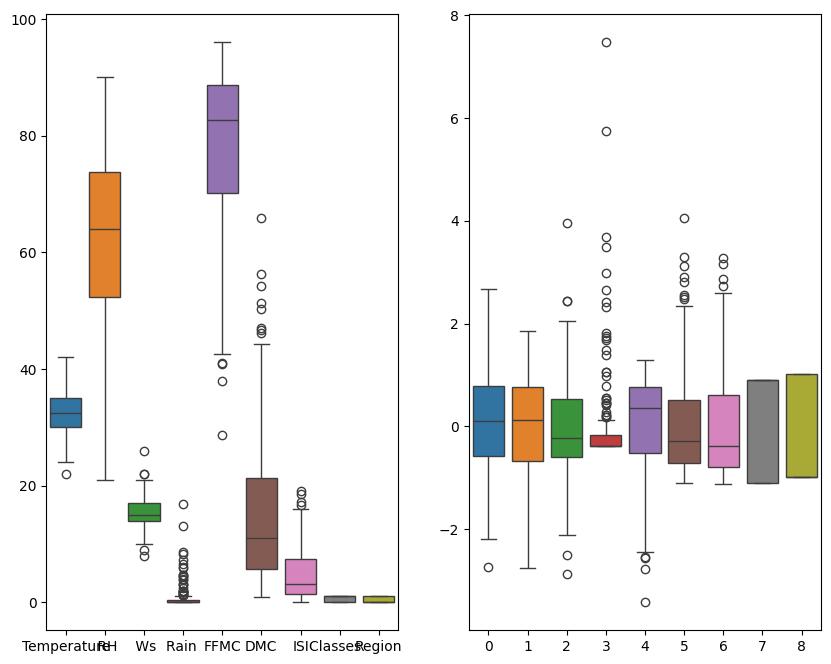

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.subplot(1,2,2)
sns.boxplot(data=x_train_sc)

In [17]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [18]:
from sklearn.linear_model import LinearRegression
linearReg=LinearRegression()
linearReg.fit(x_train_sc,y_train)
y_pred=linearReg.predict(x_test_sc)
"r2-score :" , r2_score(y_test,y_pred),"rmse :",np.sqrt(mean_squared_error(y_test,y_pred))

('r2-score :', 0.9847657384266951, 'rmse :', 0.8211435242265253)

In [19]:
def trainModel(modelName):
    model=modelName()
    model.fit(x_train_sc,y_train)
    y_pred=model.predict(x_test_sc)
    return "r2-score :" , r2_score(y_test,y_pred),"rmse :",np.sqrt(mean_squared_error(y_test,y_pred))
    

In [20]:
trainModel(LinearRegression)

('r2-score :', 0.9847657384266951, 'rmse :', 0.8211435242265253)

In [21]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [22]:
trainModel(Lasso)

('r2-score :', 0.9492020263112388, 'rmse :', 1.4994485292591664)

In [23]:
trainModel(Ridge)

('r2-score :', 0.9842993364555512, 'rmse :', 0.8336185529456561)

In [24]:
trainModel(ElasticNet)

('r2-score :', 0.8753460589519703, 'rmse :', 2.3488829474933874)

In [25]:
# now with cross validation

In [26]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [27]:
def trainModelwithCV(model):
    
    model.fit(x_train_sc,y_train)
    y_pred=model.predict(x_test_sc)
    print("r2-score :" , r2_score(y_test,y_pred),"rmse :",np.sqrt(mean_squared_error(y_test,y_pred)))
    
    return  model
    

In [28]:
lassocv=LassoCV(cv=5)
lassocv= trainModelwithCV(lassocv)

r2-score : 0.9820946715928275 rmse : 0.8902244410677355


In [29]:
# lassocv.mse_path_

In [30]:
ridgecv=RidgeCV(cv=5)
ridgecv= trainModelwithCV(ridgecv)

r2-score : 0.9842993364555512 rmse : 0.8336185529456561


In [31]:
elCV=ElasticNetCV(cv=5)
elCV=trainModelwithCV(elCV)

r2-score : 0.9814217587854941 rmse : 0.906798236449336


In [32]:
import pickle

In [33]:
pickle.dump( scalar, open('scalar.pkl','wb'))

In [34]:
pickle.dump( elCV, open('forest-model.pkl','wb'))